In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler

In [20]:
rr = pd.read_csv('time_series_19-covid-Recovered.csv', sep=',')
rr2 = rr.set_index(['Country/Region','Province/State'])
rr2.head(3)

,,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
Country/Region,Province/State,,,,,,,,,,,,,,,,,,,,,
Thailand,NaN,15.0000,101.0000,0,0,0,0,2,2,5,5,...,35,35,35,41,42,42,42,42,44,44.0
Japan,NaN,36.0000,138.0000,0,0,0,0,1,1,1,1,...,118,118,144,144,144,150,191,232,235,235.0
Singapore,NaN,1.2833,103.8333,0,0,0,0,0,0,0,0,...,105,105,109,114,114,114,124,140,144,144.0


In [21]:
# read csv:
#df = pd.read_csv('time_series_19-covid-Confirmed.csv', sep=';', index_col=0,keep_default_na=False).T
df = pd.read_csv('time_series_19-covid-Confirmed.csv', sep=',')
# re-set the index (row headers):
df2 = df.set_index(['Country/Region','Province/State'])
df2.head(3)

,,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
Country/Region,Province/State,,,,,,,,,,,,,,,,,,,,,
Thailand,NaN,15.0000,101.0000,2,3,5,7,8,8,14,14,...,82,114,147,177,212,272,322,411,599,599.0
Japan,NaN,36.0000,138.0000,2,1,2,2,4,4,7,7,...,773,839,825,878,889,924,963,1007,1086,1086.0
Singapore,NaN,1.2833,103.8333,0,1,3,3,4,5,7,7,...,212,226,243,266,313,345,385,432,455,455.0


In [22]:
dfX = df2-rr2
dfX.head(3)

,,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
Country/Region,Province/State,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0.0,0.0,0,0,0,0,0,0,0,0,...,11,16,20,21,21,21,23,23,39,39.0
Albania,NaN,0.0,0.0,0,0,0,0,0,0,0,0,...,38,42,51,55,59,64,70,74,87,87.0
Algeria,NaN,0.0,0.0,0,0,0,0,0,0,0,0,...,25,36,42,48,62,55,58,107,136,136.0


In [23]:
#remove spurious last column:
df2b = dfX.loc[:, ~df2.columns.str.contains('^Unnamed')]
# transpose:
df3 = df2b.T
df3.head(5)

Country/Region Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda  \
Province/State         NaN     NaN     NaN     NaN    NaN                 NaN   
Lat                    0.0     0.0     0.0     0.0    0.0                 0.0   
Long                   0.0     0.0     0.0     0.0    0.0                 0.0   
1/22/20                0.0     0.0     0.0     0.0    0.0                 0.0   
1/23/20                0.0     0.0     0.0     0.0    0.0                 0.0   
1/24/20                0.0     0.0     0.0     0.0    0.0                 0.0   

Country/Region Argentina Armenia                    Australia  \
Province/State       NaN     NaN Australian Capital Territory   
Lat                  0.0     0.0                          0.0   
Long                 0.0     0.0                          0.0   
1/22/20              0.0     0.0                          0.0   
1/23/20              0.0     0.0                          0.0   
1/24/20              0.0     0.0                          0.0   

Country/Region                        ... United Kingdom              \
Province/State From Diamond Princess  ...      Gibraltar Isle of Man   
Lat                              0.0  ...            0.0         0.0   
Long                             0.0  ...            0.0         0.0   
1/22/20                          0.0  ...            0.0         0.0   
1/23/20                          0.0  ...            0.0         0.0   
1/24/20                          0.0  ...            0.0         0.0   

Country/Region                           Uruguay Uzbekistan Venezuela Vietnam  \
Province/State Montserrat United Kingdom     NaN        NaN       NaN     NaN   
Lat                   0.0            0.0     0.0        0.0       0.0     0.0   
Long                  0.0            0.0     0.0        0.0       0.0     0.0   
1/22/20               0.0            0.0     0.0        0.0       0.0     0.0   
1/23/20               0.0            0.0     0.0        0.0       0.0     2.0   
1/24/20               0.0            0.0     0.0        0.0       0.0     2.0   

Country/Region Zambia Zimbabwe  
Province/State    NaN      NaN  
Lat               0.0      0.0  
Long              0.0      0.0  
1/22/20           0.0      0.0  
1/23/20           0.0      0.0  
1/24/20           0.0      0.0  

[5 rows x 501 columns]

In [24]:
# remove Lat/Long rows
df4 = df3.drop(['Lat','Long'])
df4.tail(3)

Country/Region Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda  \
Province/State         NaN     NaN     NaN     NaN    NaN                 NaN   
3/21/20               23.0    74.0   107.0    87.0    2.0                 1.0   
3/22/20               39.0    87.0   136.0   112.0    2.0                 1.0   
3/23/20               39.0    87.0   136.0   112.0    2.0                 1.0   

Country/Region Argentina Armenia                    Australia  \
Province/State       NaN     NaN Australian Capital Territory   
3/21/20            155.0   159.0                          9.0   
3/22/20            222.0   192.0                         19.0   
3/23/20            222.0   192.0                         19.0   

Country/Region                        ... United Kingdom              \
Province/State From Diamond Princess  ...      Gibraltar Isle of Man   
3/21/20                          0.0  ...            8.0         1.0   
3/22/20                          0.0  ...           13.0         5.0   
3/23/20                          0.0  ...           13.0         5.0   

Country/Region                           Uruguay Uzbekistan Venezuela Vietnam  \
Province/State Montserrat United Kingdom     NaN        NaN       NaN     NaN   
3/21/20               1.0         4953.0   110.0       43.0      70.0    77.0   
3/22/20               1.0         5618.0   135.0       43.0      55.0    96.0   
3/23/20               1.0         5618.0   135.0       43.0      55.0    96.0   

Country/Region Zambia Zimbabwe  
Province/State    NaN      NaN  
3/21/20           2.0      3.0  
3/22/20           3.0      3.0  
3/23/20           3.0      3.0  

[3 rows x 501 columns]

In [25]:
# convert index to dateTime:
df4.index = pd.DatetimeIndex(df4.index)
df4.head(3)

Country/Region Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda  \
Province/State         NaN     NaN     NaN     NaN    NaN                 NaN   
2020-01-22             0.0     0.0     0.0     0.0    0.0                 0.0   
2020-01-23             0.0     0.0     0.0     0.0    0.0                 0.0   
2020-01-24             0.0     0.0     0.0     0.0    0.0                 0.0   

Country/Region Argentina Armenia                    Australia  \
Province/State       NaN     NaN Australian Capital Territory   
2020-01-22           0.0     0.0                          0.0   
2020-01-23           0.0     0.0                          0.0   
2020-01-24           0.0     0.0                          0.0   

Country/Region                        ... United Kingdom              \
Province/State From Diamond Princess  ...      Gibraltar Isle of Man   
2020-01-22                       0.0  ...            0.0         0.0   
2020-01-23                       0.0  ...            0.0         0.0   
2020-01-24                       0.0  ...            0.0         0.0   

Country/Region                           Uruguay Uzbekistan Venezuela Vietnam  \
Province/State Montserrat United Kingdom     NaN        NaN       NaN     NaN   
2020-01-22            0.0            0.0     0.0        0.0       0.0     0.0   
2020-01-23            0.0            0.0     0.0        0.0       0.0     2.0   
2020-01-24            0.0            0.0     0.0        0.0       0.0     2.0   

Country/Region Zambia Zimbabwe  
Province/State    NaN      NaN  
2020-01-22        0.0      0.0  
2020-01-23        0.0      0.0  
2020-01-24        0.0      0.0  

[3 rows x 501 columns]

In [26]:
# extract regions we are interested in:
df6 = df4.loc[:,[
    ('China','Hubei'),
    ('China','Beijing'),
    ('Germany',''),
    ('Italy',''),
    ('Japan',''),
    ('France','France'),
#    ('China','Anhui'),
    ('Switzerland',''),
    ('Singapore',''),
    ('Korea, South',''),
    ('Poland',''),
    ("US","Washington"),
    ("Spain",""),
    ("Austria","")
]]
df6.tail(3)

Country/Region   China          Germany    Italy  Japan   France Switzerland  \
Province/State   Hubei Beijing      NaN      NaN    NaN   France         NaN   
2020-03-21      8854.0   108.0  21980.0  47506.0  775.0  14270.0      6560.0   
2020-03-22      8367.0   114.0  24607.0  52114.0  851.0  13818.0      7114.0   
2020-03-23      7921.0   122.0  24607.0  52114.0  851.0  13818.0      7114.0   

Country/Region Singapore Korea, South Poland         US    Spain Austria  
Province/State       NaN          NaN    NaN Washington      NaN     NaN  
2020-03-21         292.0       7259.0  535.0     1793.0  23249.0  2805.0  
2020-03-22         311.0       5988.0  633.0     1996.0  26193.0  3235.0  
2020-03-23         311.0       5988.0  633.0     1996.0  26193.0  3235.0

In [27]:
# divide by population density.  first had this via separate csv files, 
# but the "countries" are not stable in the upstream data
df6.loc[:,('China','Beijing')] /= 22.
df6.loc[:,('China','Hubei')] /= 60.
df6.loc[:,('Japan',np.nan)] /= 126.8
df6.loc[:,('Korea, South',np.nan)] /= 52.
df6.loc[:,('Singapore',np.nan)] /= 5.85
df6.loc[:,('France','France')] /= 67.
df6.loc[:,('Germany',np.nan)] /= 82.79
df6.loc[:,('Italy',np.nan)] /= 60.5
df6.loc[:,('Switzerland',np.nan)] /= 8.57
df6.loc[:,('Poland',np.nan)] /= 4.
df6.loc[:,('US','Washington')] /= 7.6
#df6.loc[:,("US","King County, WA")] /= 2.2
df6.loc[:,("Spain",np.nan)] /= 47.
df6.loc[:,("Austria",np.nan)] /= 8.8
df6.tail(3)

Country/Region       China               Germany      Italy     Japan  \
Province/State       Hubei   Beijing         NaN        NaN       NaN   
2020-03-21      147.566667  4.909091  265.491001  785.22314  6.111987   
2020-03-22      139.450000  5.181818  297.221887  861.38843  6.711356   
2020-03-23      132.016667  5.545455  297.221887  861.38843  6.711356   

Country/Region      France Switzerland  Singapore Korea, South  Poland  \
Province/State      France         NaN        NaN          NaN     NaN   
2020-03-21      212.985075  765.460910  49.914530   139.596154  133.75   
2020-03-22      206.238806  830.105018  53.162393   115.153846  158.25   
2020-03-23      206.238806  830.105018  53.162393   115.153846  158.25   

Country/Region          US       Spain     Austria  
Province/State  Washington         NaN         NaN  
2020-03-21      235.921053  494.659574  318.750000  
2020-03-22      262.631579  557.297872  367.613636  
2020-03-23      262.631579  557.297872  367.613636

In [28]:
# time-shifted Hubei values:
hb = df6["China","Hubei"]
hb.index = pd.date_range(start="2020-03-07",periods=hb.size)
hb.name=("China","Hubei time-shifted")
hb.tail(3)

2020-05-05    147.566667
2020-05-06    139.450000
2020-05-07    132.016667
Freq: D, Name: (China, Hubei time-shifted), dtype: float64

In [29]:
df6b = pd.concat([df6,hb],axis=1) #.fillna(value=0)
# mar/12 data looks faulty especially in Europe:
df6b.drop(index=pd.to_datetime('2020-03-12'),inplace=True)
df6b.loc['2020-03-10':'2020-03-15',:]

Country/Region       China              Germany       Italy     Japan  \
Province/State       Hubei   Beijing        NaN         NaN       NaN   
2020-03-10      333.616667  4.954545  17.381326  155.785124  3.785489   
2020-03-11      310.650000  4.954545  22.744293  188.710744  4.108833   
2020-03-13      270.550000  4.272727  43.833796  268.115702  4.597792   
2020-03-14      247.166667  4.000000  54.825462  317.206612  5.165615   
2020-03-15      225.100000  4.045455  69.440754  370.446281  5.686120   

Country/Region     France Switzerland  Singapore Korea, South Poland  \
Province/State     France         NaN        NaN          NaN    NaN   
2020-03-10      26.447761   56.942824  14.017094   139.730769   5.50   
2020-03-11      33.865672   75.612602  14.017094   143.596154   7.75   
2020-03-13      54.462687  132.438740  17.606838   143.634615  17.00   
2020-03-14      66.522388  158.109685  18.290598   145.692308  25.75   
2020-03-15      66.970149  256.242707  20.683761   147.153846  29.75   

Country/Region         US       Spain    Austria              China  
Province/State Washington         NaN        NaN Hubei time-shifted  
2020-03-10      35.000000   35.382979  20.227273          12.150000  
2020-03-11      48.026316   44.553191  27.500000          16.933333  
2020-03-13      74.605263  107.212766  56.590909          57.900000  
2020-03-14      75.131579  124.978723  73.750000          57.766667  
2020-03-15      84.473684  154.914894  97.045455          80.216667

In [30]:
germany = df6b['Germany']

In [31]:
fit = pd.Series(0.3*np.exp(np.arange(0,30,1)*np.log(2.)/2.8))
fit.index = pd.date_range(start="2020-02-22",periods=fit.size)

In [32]:
combined = pd.concat([germany,fit],axis=1)

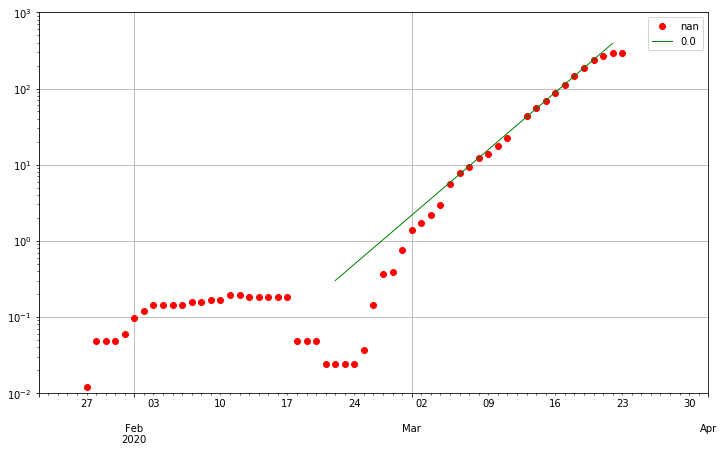

In [34]:
plt.close('all')
plt.rcParams['figure.figsize']=[12,7]
default_cycler = (cycler(color=['r', 'g', 'b', 'y']) +
                  cycler(linestyle=['', '-', ':', '-.']) +
                  cycler(marker=['o','','','']))
plt.rc('lines', linewidth=1)
plt.rc('axes', prop_cycle=default_cycler)
combined.plot(kind='line',
                     logy=True,ylim=(0.01,1000),xlim=("2020-01-22","2020-04-01"),
                    grid=True)

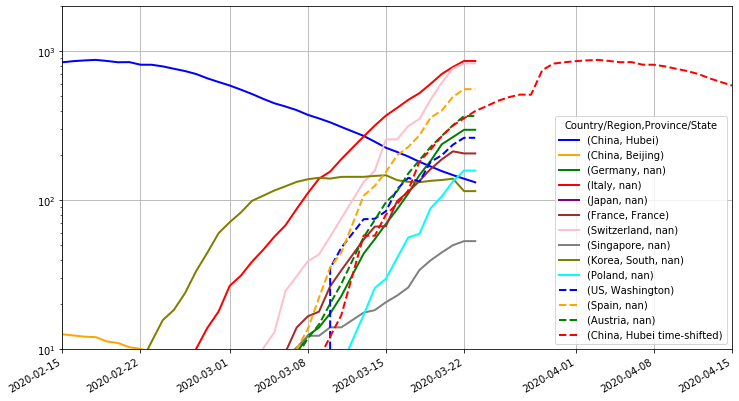

In [39]:
default_cycler = (cycler(color=['blue','orange','green','red','purple','brown','pink'
                                ,'gray','olive','cyan',
                               'blue','orange','green','red','purple','brown','pink'
                                ,'gray','olive','cyan']) +
                  cycler(linestyle=['-','-','-','-','-','-','-','-','-','-',
                                   '--','--','--','--','--','--','--','--','--','--']) +
                  cycler(marker=['','','','','','','','','','','','','','','','','','','','']))
plt.rc('axes', prop_cycle=default_cycler)
plt.rc('lines', linewidth=2)
df6b.plot(kind='line',logy=True,ylim=(10,2000),xlim=('2020-02-15','2020-04-15'),grid=True)

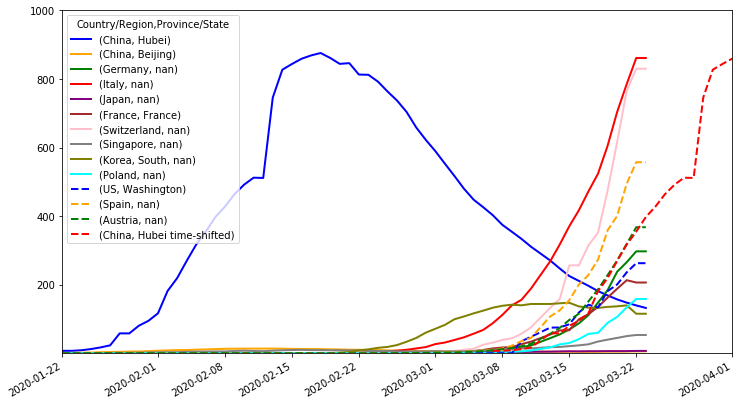

In [36]:
df6b.plot(kind='line',ylim=(0.01,1000),xlim=("2020-01-22","2020-04-01"))

In [37]:
df6.loc[:,('Poland',np.nan)].to_string()

'2020-01-22      0.00\n2020-01-23      0.00\n2020-01-24      0.00\n2020-01-25      0.00\n2020-01-26      0.00\n2020-01-27      0.00\n2020-01-28      0.00\n2020-01-29      0.00\n2020-01-30      0.00\n2020-01-31      0.00\n2020-02-01      0.00\n2020-02-02      0.00\n2020-02-03      0.00\n2020-02-04      0.00\n2020-02-05      0.00\n2020-02-06      0.00\n2020-02-07      0.00\n2020-02-08      0.00\n2020-02-09      0.00\n2020-02-10      0.00\n2020-02-11      0.00\n2020-02-12      0.00\n2020-02-13      0.00\n2020-02-14      0.00\n2020-02-15      0.00\n2020-02-16      0.00\n2020-02-17      0.00\n2020-02-18      0.00\n2020-02-19      0.00\n2020-02-20      0.00\n2020-02-21      0.00\n2020-02-22      0.00\n2020-02-23      0.00\n2020-02-24      0.00\n2020-02-25      0.00\n2020-02-26      0.00\n2020-02-27      0.00\n2020-02-28      0.00\n2020-02-29      0.00\n2020-03-01      0.00\n2020-03-02      0.00\n2020-03-03      0.00\n2020-03-04      0.25\n2020-03-05      0.25\n2020-03-06      1.25\n2020-03-0

In [46]:
df6.loc[:,('Poland',np.nan)]

2020-01-22      0.00
2020-01-23      0.00
2020-01-24      0.00
2020-01-25      0.00
2020-01-26      0.00
               ...  
2020-03-18     59.50
2020-03-19     88.50
2020-03-20    106.00
2020-03-21    133.75
2020-03-22    158.25
Name: (Poland, nan), Length: 61, dtype: float64

In [47]:
df5.loc[:,('Mainland China','Anhui')] /= 9999999.
df5.head(3)

NameError: name 'df5' is not defined

In [ ]:
df5.to_csv("all.csv")

In [ ]:
df6['idx'] = df6.reset_index().index
df6.tail(3)

In [ ]:
df6.to_csv("reduced.csv",sep='\t',header=False)

In [ ]:
df6.iterrows?

In [ ]:
hb = df6["Mainland China"]["Hubei"]
hb.index = pd.date_range(start="2020-02-22",periods=hb.size)
hb.head(3)

In [ ]:
hb.index = pd.DatetimeIndex?

In [ ]:
pd.date_range(start="2020-01-22",periods=5)

In [ ]:
fit = pd.Series(np.exp(np.arange(0,10,1)/8))
fit.index = pd.date_range(start="2020-02-22",periods=fit.size)
fit

In [ ]:
3.9*np.log(10.)